Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "Aleksandar Gradev"
STUDENTID = "12321078"
GROUPID = "8";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

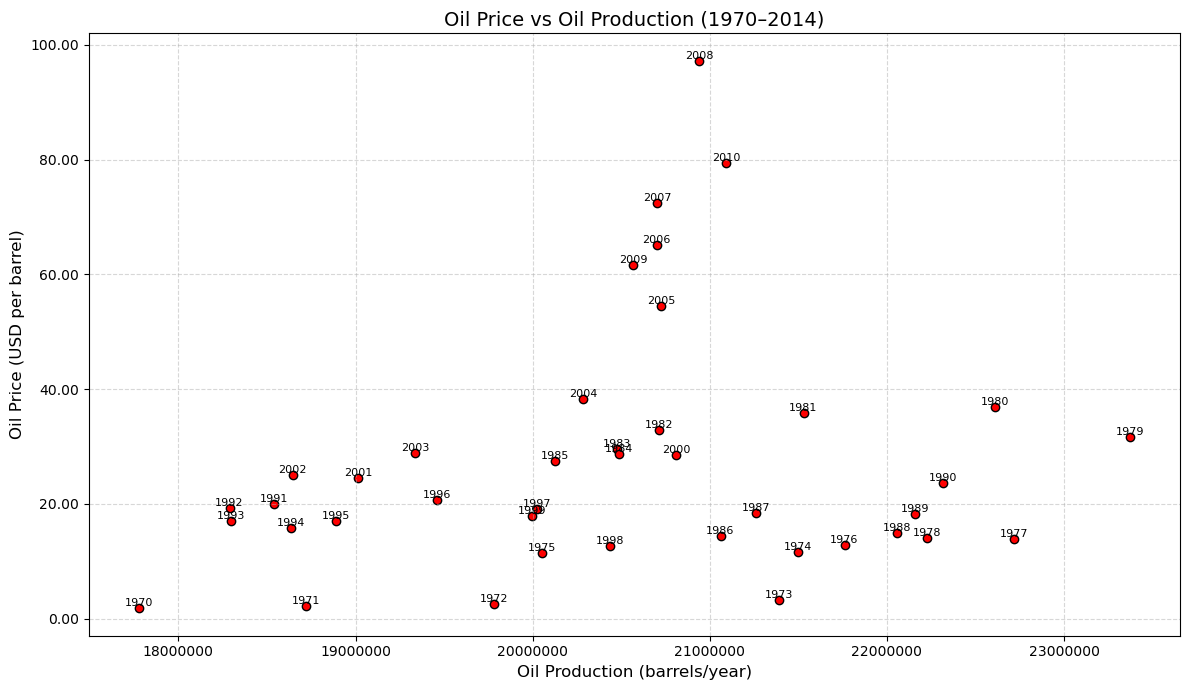

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load dataset
df = pd.read_csv("./data/data_notebook-1_Oil&Gas.csv")

# Group by year and calculate average oil price and production
data = df.groupby("year")[["oil_price_nom", "oil_price_2000", "oil_prod32_14"]].mean().reset_index()
data = data[data["year"] >= 1970]

# Plotting the scatterplot
plt.figure(figsize=(12, 7))
plt.scatter(
    data["oil_prod32_14"],
    data["oil_price_nom"],
    color="red",
    edgecolor="black"
)

# Annotate each point with the corresponding year
for i, row in data.iterrows():
    plt.text(row["oil_prod32_14"], row["oil_price_nom"], str(int(row["year"])),
             fontsize=8, ha='center', va='bottom')

# Axis labels and title
plt.title("Oil Price vs Oil Production (1970–2014)", fontsize=14)
plt.xlabel("Oil Production (barrels/year)", fontsize=12)
plt.ylabel("Oil Price (USD per barrel)", fontsize=12)

# Format axis ticks for better readability
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

What is the task according to Saket et al. (2019)?
According to Saket et al. (2019), the task we are addressing with our scatterplot is a “Find Correlation” task. This task involves determining whether there is a relationship between two numerical variables—in our case, oil production and oil price. Scatterplots are especially well suited for visualizing numerical–numerical data relationships, and the authors confirm that this visualization type is among the most effective for identifying correlations.

Why is the chosen visualisation effective for the given task?
We chose a scatterplot because it uses position on both axes to represent values, which is one of the most accurate visual encodings available. This makes it easier for us to visually assess whether the data points suggest a trend or correlation. Additionally, the inclusion of year labels helps us contextualize the data points temporally. As Saket et al. point out, scatterplots enable users to detect patterns and relationships efficiently, especially for correlation-focused tasks.


What does the visualisation show exactly?
The scatterplot illustrates the relationship between global oil production and oil prices from 1970 to 2014. Each point represents a year and is labeled accordingly. We observe that while oil production has generally increased over time, oil prices have fluctuated greatly. There is no clear linear relationship between the two variables. This suggests that other external factors—such as political events, supply shocks, or economic crises—may significantly influence oil prices beyond simple production levels.

What does the visualisation contribute to answering your project’s questions?
Our project aims to explore the relationship between oil production, oil prices, and the stock performance of oil companies. This scatterplot helps us analyze part of that relationship by showing how oil production and oil price interact over time. Understanding this connection is essential for us to assess whether fluctuations in oil prices are driven by changes in production or by other factors. The insights we gain here provide the foundation for the next step in our project—comparing these patterns with stock price movements of oil companies. By isolating the production–price dynamics, we can better understand to what extent these variables might explain stock value changes.

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

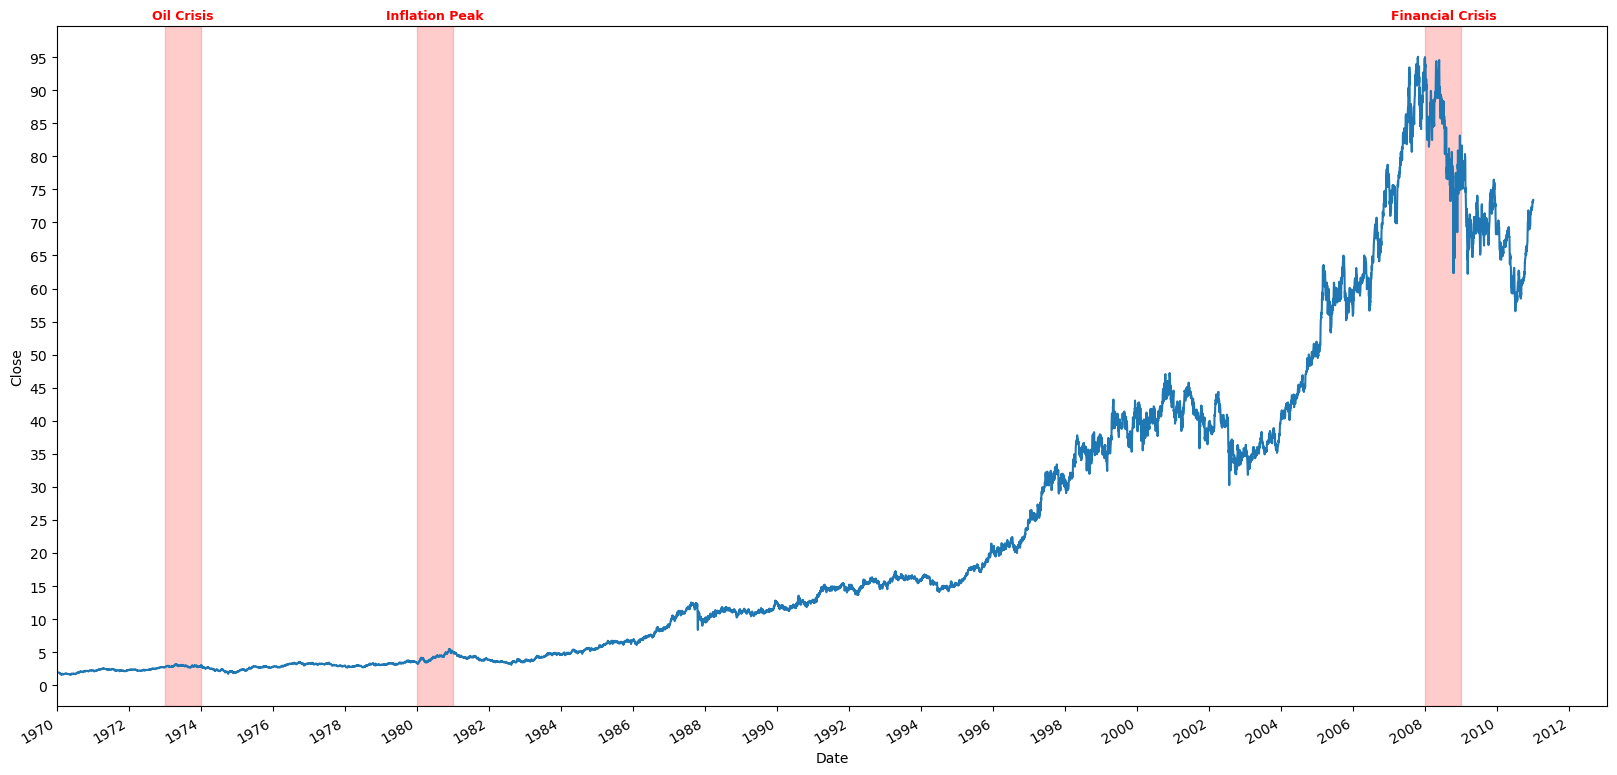

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# First we read the file and find an issue with the key "Date" so we fixed it.
with open('./data/data_notebook-1_price.json') as f:
    fixed = f.read().replace('"Datevalid:', '"Date":')
    
# Load it into DataFrame
df = pd.read_json(fixed)
#Filter data to start from 1970
df = df[df["Date"] >= "1970-01-01"]
#For the plot we only need "Date" and "Close"
df_line = df[["Date", "Close"]]


#Now we plot the line chart
ax = df_line.plot(kind="line", x="Date", legend=False, y="Close", figsize=(20, 10))
#Set X-Axis to ever year
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#start plot with 1970
ax.set_xlim(left=pd.Timestamp("1970-01-01"))
# Set Y axis to more ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
#Label the axis
plt.xlabel("Date")
plt.ylabel("Close")


event_labels = {
    1973: "Oil Crisis",
    1980: "Inflation Peak",
    2008: "Financial Crisis"
}

for year, label in event_labels.items():
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year}-12-31")
    
    # Highlight full year
    ax.axvspan(start, end, color='red', alpha=0.2)

    # Label centered above the span, in axis coordinates
    ax.annotate(
        label,
        xy=(start + (end - start) / 2, 1.01),  # 1.01 = just above the top
        xycoords=('data', 'axes fraction'),
        ha='center',
        fontsize=9,
        color='red',
        weight='bold'
    )


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

* According to Saket et al. (2019), the task supported by the chosen visualisation for plotting the closing prices over time is Determine Range. This task focuses on identifying the span of values for a specific attribute, in this case, the closing price. By visualising the data, we can see how high or low the prices went during the selected time period. This is especially useful for looking at how the prices changed during the crisis periods.

* The chosen visualisation is effective for the task Determine Range as described by Saket et al. (2019). Since we are working with time series data, using a line plot makes it easier to observe how values evolve and where the peaks and lows occur. Looking at the visual summary in Figure 3 from Saket et al., we can see that the line chart performs especially well for the Determine Range task when it comes to time efficiency. We had previously used a scatter plot, which is good for visualizing individual data points, but the line plot adds an additional layer of clarity by connecting the points. Especially when examining data across the different crisis periods, a line plot allows us to immediately recognize drops or spikes in price, making it easier to interpret the range within a specific timeframe.


* The visualization is a line chart that shows how the closing price of ExxonMobil’s stock has changed over time, from 1970 to 2012. The x-axis represents the time date with the labels shown for every second year and the y-axis shows the closing price within 5er ticks to improve readability. To give more context to our research question, we implemented timestamps for the three major economic events, highlighted with red shaded areas: the Oil Crisis , the Inflation Peak and the Financial Crisis in 2008. These events are labeled directly on the chart.


* The visualisation helps answering our research question by showing how the stock price of the oil company developed over time, especially during the three major crises: the oil crisis, the inflation peak, and the financial crisis. The line plot makes it easy to spot how the stock reacted during these periods—for example, we can clearly see a drop during the financial crisis in 2008. It helps us analyze the impact of each crisis on the stock performance. Also, by comparing this chart with oil price data, we can look for patterns and check for correlation between the two data sets. 

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

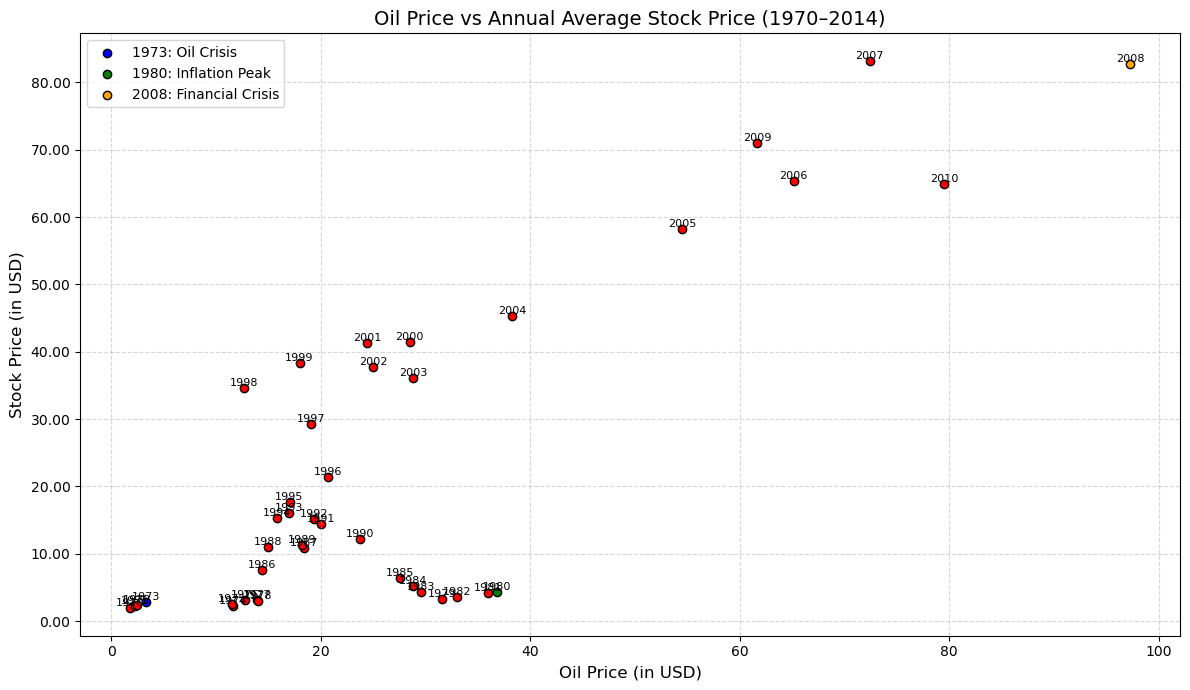

In [4]:
# Prepare dataset 1 for merging
df_oil = data.copy()
df_oil = df_oil[['year', 'oil_price_nom']]
df_oil = df_oil.rename(columns = {"year": "Year"})

# Prepare dataset 2 for merging
df_stock = df_line.copy()
df_stock['Year'] = df_stock['Date'].dt.year
df_stock = df_stock.groupby('Year')['Close'].mean().rename("stock_close_price_nom")
df_stock = df_stock.reset_index()

# Merge them
df_merged = pd.merge(df_oil, df_stock, on = "Year", how = "left")

event_labels = {
    1973: ("Oil Crisis", "blue"),
    1980: ("Inflation Peak", "green"),
    2008: ("Financial Crisis", "orange")
}

# Plot
plt.figure(figsize=(12, 7))

# Plot normal points (non-special years)
for i, row in df_merged.iterrows():
    year = int(row["Year"])
    if year not in event_labels:
        plt.scatter(row["oil_price_nom"], row["stock_close_price_nom"], color="red", edgecolor="black")

# Plot special points with different colors
for i, row in df_merged.iterrows():
    year = int(row["Year"])
    if year in event_labels:
        label, color = event_labels[year]
        plt.scatter(row["oil_price_nom"], row["stock_close_price_nom"], color=color, edgecolor="black", label=f"{year}: {label}")

# Annotate all points
for i, row in df_merged.iterrows():
    plt.text(row["oil_price_nom"], row["stock_close_price_nom"], str(int(row["Year"])),
             fontsize=8, ha='center', va='bottom')

# Axis labels and title
plt.title("Oil Price vs Annual Average Stock Price (1970–2014)", fontsize=14)
plt.xlabel("Oil Price (in USD)", fontsize=12)
plt.ylabel("Stock Price (in USD)", fontsize=12)

# Format axis ticks for better readability
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.2f}'))

# Grid, legend and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

 - What is the task according to Saket et al. (2019)? - According to Saket et al. (2019), the task we are addressing with our scatterplot is a “Find Correlation” task. This task involves determining whether there is a relationship between two numerical variables — in our case, oil price and stock price. Scatterplots are especially well suited for visualizing numerical–numerical data relationships, and the authors confirm that this visualization type is among the most effective for identifying correlations.


 - Why is the chosen visualisation effective for the given task? - We chose a scatterplot because it uses position on both axes to represent values, which is one of the most accurate visual encodings available. This makes it easier for us to visually assess whether the data points suggest a trend or correlation. Additionally, the inclusion of year labels helps us contextualize the data points temporally. As Saket et al. point out, scatterplots enable users to detect patterns and relationships efficiently, especially for correlation-focused tasks.


- What does the visualisation show exactly? - The scatterplot illustrates the relationship between global annual oil prices and the yearly average stock price of the oil producer ExxonMobil from 1970 to 2014. Each data point represents a specific year, labeled accordingly, with three years (marked in distinct colors) highlighting major macroeconomic events. Overall, the plot reveals a general upward trend - as oil prices increase, ExxonMobil’s stock price tends to rise as well. This pattern is intuitive, as higher oil prices typically lead to greater revenues and profitability for oil companies. However, the highlighted years provide insight into how this relationship has evolved over time. In the early years following the 1973 oil crisis, oil prices increased significantly while the company’s stock price remained relatively constant. After the 1980 inflation peak, a negative relationship briefly emerged - oil prices declined while stock prices began to rise. Since the 1990s the correlation between oil and stock prices becomes more consistently positive and linear. This suggests that while there is an underlying connection between oil prices and stock performance, the relationship is heavily influenced by broader macroeconomic conditions.

- What does the visualisation contribute to answering your project’s questions? - The visualization directly contributes to answering our research question "Does oil company stock performance correlate with global oil price and what impact have the three major crisises on our data?" by clearly illustrating the correlation between global oil prices and ExxonMobil’s stock performance from 1970 to 2014. It reveals a general positive trend, suggesting that stock prices tend to rise with increasing oil prices, which supports the hypothesis of a correlation. By plotting both variables the scatterplot allows us to observe not just the general trend, but also how this relationship shifts during the periods of economic instability. The visualization not only confirms a general correlation but also shows that this relationship is significantly influenced and at times disrupted by major macroeconomic events, which is central to our research question.

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [5]:
df_merged.to_csv("./data/oil_price_vs_share_price.csv", index = False)